# Author : Paritosh Diwakar Mohite

## GRIPMAR21 - The Spark Foundation- Data Science & Business Analytics Internship

### Task 1 : Simple Linear Regression
 - The problem statement is to predict the percentage of a student based on the number of study hours and we have to calculate the predicted score if a student studies for 9.25 hours/day.

#### Importing libraries
 - PANDAS,NUMPY for data manuplation.
 - Matplotlib,seaborn module for Data Visualisation.
 - sklearn for modelling

## Step 1: Reading and Understanding the Data

In [2]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Read data from the given url
score_data = "http://bit.ly/w-data"
score_data = pd.read_csv(score_data)
score_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# Inspect the various aspects of our dataframe
# number of rows and column in dataframe
print("Rows :",score_data.shape[0])
print("Columns :",score_data.shape[1])

Rows : 25
Columns : 2


In [6]:
score_data.info()
'''
interpretations:
there are no null values are present in the dataset
'''


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


'\ninterpretations:\nthere are no null values are present in the dataset\n'

In [7]:

'''
interpretaions:
looking into the table we get to know the some statistical information such mean, median, standard deviation and quartile ranges
'''
score_data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Step 2 : Exploratory Data Analysis

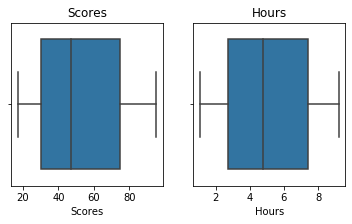

In [9]:
'''
To check for Outliers
As outliers can have a disproportionate effect on statistical results, which can result in misleading interpretations,
outliers can affect the mean and standard deviations we can look for outliers using different visualization called
box plot, histogram or scatter plot
here we will use box plot to check for any outliers
'''
fig = plt.figure(figsize=(6,3))

scores = fig.add_subplot(1, 2, 1, title="Scores")
hours = fig.add_subplot(1, 2, 2, title="Hours")

sns.boxplot(score_data.Scores, ax=scores)
sns.boxplot(score_data.Hours, ax=hours)

plt.show()

No Outlier found to be treated henceforth.

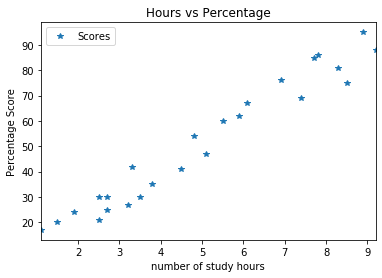

In [10]:
# Plotting the distribution of scores
score_data.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('number of study hours')  
plt.ylabel('Percentage Score')  
plt.show()

From the above graph, we can infer that there is a positive linear relation between the number of study hours and Percentage Score

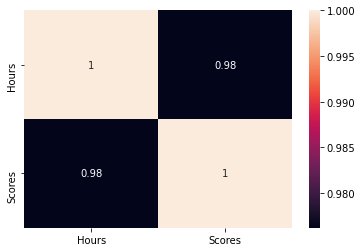

In [10]:
# To check for Correlation

sns.heatmap(score_data.corr(),annot=True)
plt.show()

Hours and Scores are highly Positively correlated to each other

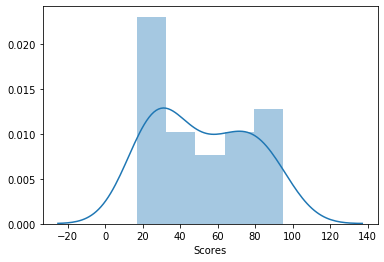

In [11]:
'''
To check for distribution of Scores in the dataset
Almost normally distributed with skew in the positive side Hence, we can perform a LINEAR REGRESSION to predict the values

'''
sns.distplot(score_data['Scores'], bins=5)
plt.show()

Almost normally distributed with skew in the positive side Hence, we can perform a LINEAR REGRESSION to predict the values

## Step 3: Performing Simple Linear Regression

### Generic Steps in model building
   - First assign the feature variable, Hours to the variable X and the response variable, Score, to the variable y.
   - To divide the data into "attributes" (inputs) and "labels" (outputs).

In [12]:
X = score_data.iloc[:, :-1].values  
y = score_data.iloc[:, 1].values

#### Train-Test Split
   - To split our variable into training and testing sets.
   - Will perform this by importing train_test_split from the sklearn.model_selection library. 
   - It is usually a good practice to keep 80% of the data in your train dataset and the rest 20% in your test dataset.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
#Now let's take a look at train and test datasets individually

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


##### After splitting the data into training and testing sets,finally it's the time to train our algorithm.

## Step 4 : Training Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression  
lin_reg = LinearRegression()  
lin_reg.fit(X_train, y_train) 


LinearRegression()

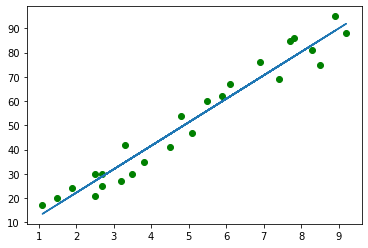

In [17]:
# Plotting the regression line
line = lin_reg.coef_*X+lin_reg.intercept_

# Plotting for the test data
plt.scatter(X, y, c= 'g')
plt.plot(X, line);
plt.show()

## Checking Accuracy Scores for both training as well as testing sets

In [18]:
print("Training Score:",lin_reg.score(X_train,y_train)*100)
print("Testing Score:",lin_reg.score(X_test,y_test)*100)

Training Score: 94.91209376364415
Testing Score: 96.78055545167994


## Step 5: Predictions on the Test Set
 - Now that we have fitted a regression line on our train dataset, it's time to make some predictions on the test data. For this, we first need to add a constant to the X_test data like we did for X_train and then we can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [19]:
print("y_test :")
print(y_test)
print()
print("X_test :")
print(X_test)

y_test :
[81 30 21 76 62]

X_test :
[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [20]:
# Predicting the scores
y_pred = lin_reg.predict(X_test)
print("y_pred :")
print(y_pred)

y_pred :
[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


In [21]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


#### What will be predicted score if a student study for 9.25 hrs in a day?

In [22]:
# we can also test with our own data
hours = 9.25
own_pred = lin_reg.predict([[hours]])
print("No of study Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of study Hours = 9.25
Predicted Score = 92.38611528261494


## Final Step 6: Evaluating the model
 - The final step is to evaluate the performance of algorithm. This step is quite important to compare how well different algorithms perform on a particular dataset. we have chosen the mean square error. Also, there are many such metrics which we can choose.

In [23]:
from sklearn import metrics

#### Mean Absolute Error

In [24]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244


##### Root Mean Square Error

In [25]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 18.943211722315272


That means that the model doing great linear model as less MAE and good R-Square value

## Conclusion:

 - After Analysing the dataset we got Predicted score around 92 based on the number of study hours i.e., 9.25 hrs/day.